<h1>Definition of Principal Component Analysis</h1>
Principal Components Analysis, also known as PCA, is a technique commonly used for reducing the dimensionality of data while preserving as much as possible of the information contained in the original data.<br>
It's a way of simplifying complex data into easier to understand information.
<p>
<h3>Why Do We Need PCA</h3>
It is generally proven that machine learning models begin to perform poorly when a set of features are too large. Hence the need of a Dimensionality Reduction Technique to reduce the dimension (or features) of the dataset to make it easily useful for prediction and for visualization. Its also important to note that PCA is used when there is an observed MultiColinearity or Correlation between the variables. 
<h3>How then Does PCA work</h3>
PCA iterates through each columns and the values in all the columns to find the part of the dataset that has the most information. You will ask: "How can it identify the part of the data that has the most information?" It identifies the aspect of the dataset with the most information by simply analysing the aspect of the data with the most VARIANCE. Originally, the higher the variance in a dataset, the higher the information. So PCA  uses the values in the columns of a dataset, analyzes the relationships and patterns between these values of the different columns in the dataset to find the principal components that capture the most important information. PCA then combines similar (correlated) features or columns, and creates new features called <b>EIGEN VECTORS</b>, which are Superior to original features. These new columns (features) have values called <b>EIGEN VALUES</b>. <br>These eigenvectors define the directions in the data that capture the most variance, and they are used to create the principal components. The principal components can then be used to reduce the dimensionality of the data, make it easier to analyze and visualize, and capture the most important information in the original dataset WHILE  the eigenvalues represent the amount of variance in the data that is captured by each principal component, or eigenvector. The eigenvalues are used to rank the principal components, with the principal component corresponding to the largest eigenvalue being considered the most important. <br>
When PCA is applied to a dataset, it finds the eigenvectors (principal components) of the covariance matrix that correspond to the largest eigenvalues. The eigenvectors define the directions in the data that capture the most variance, and the eigenvalues indicate the amount of variance captured by each eigenvector. The combination of the eigenvectors and eigenvalues can be used to reduce the dimensionality of the data, make it easier to analyze and visualize, and capture the most important information in the original dataset.  </p>
<hr>
<br>
<h3>Steps</h3>
<ol>
<li>Import and clean the data</li>
<li>Standardize the data so that each column has a mean of zero </li>
<li>Check the correlation to see the correlation of the features</li>
<li>If they are correlated, then go forward to PCA</li>
<li>Import the PCA from sklearn, set the number of the components (you can pass a float value if you want an actual level of explained variation)</li>
<li>Print the explained variance ratio</li>
</ol>
<hr>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
len(df.columns)

9

In [ ]:
# Scale the dataframe
from sklearn.preprocessing import StandardScaler # .................. Import the scaler to scale the dataset
scale = StandardScaler() # .......................................... Instantiate the scaler
numerical = df.select_dtypes(exclude = 'object').dropna() # ......... Select only the numerical variables
selected = numerical.drop(['median_house_value'], axis = 1) # ....... Drop the target output
scale.fit(selected) # ............................................... Fit the scaler algorithm on the dataset
scaled = scale.transform(selected) # ................................ Transform this fitted dataset
scaled.shape # ...................................................... Show the shape of the new scaled dataframe

(17000, 8)

In [ ]:
# import PCA and find out the optimal number of components
from sklearn.decomposition import PCA # ............................. Import the PCA Algorithm
pca = PCA(n_components = scaled.shape[1]) # .......Firstly, make all the entire columns to be components
pca.fit(scaled) # ................................................... Fit the PCA Algorithm on the dataset

PCA(n_components=8)

In [ ]:
x_pca = pca.transform(scaled) # .................. transform the data
display(pd.DataFrame(x_pca).head()) # ............ Turn the dataset to a dataframe for easy visualization.
print('x_pca: ',x_pca.shape)
print('scaled: ', scaled.shape)

,0,1,2,3,4,5,6,7
0,1.756371,-2.081541,-0.881396,-1.337153,-1.651622,1.242562,-0.332564,0.885733
1,2.886282,-1.789440,-0.933482,-0.783609,-2.406858,1.467919,-0.202815,1.819250
2,-1.375555,-2.577270,-0.613384,-1.696212,-0.306253,0.738101,-0.520207,-0.069170
3,-0.711540,-2.548927,0.141960,-1.472921,-0.416032,0.671038,-0.610399,0.008683
4,-0.773053,-2.532118,-0.656955,-1.300842,-0.384212,0.709077,-0.535324,-0.080249


x_pca:  (17000, 8)
scaled:  (17000, 8)


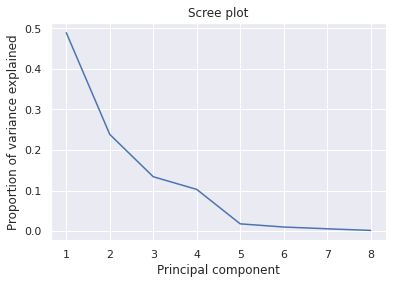

In [ ]:
# Here we ascertain what optimum number of components will be best, using the elbow plot

sns.set(style = 'darkgrid')
plt.plot(range(1, scaled.shape[1] + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.title('Scree plot')
plt.show()

This shows that 3 is the optimal number of principal component we should use

In [ ]:
# Now input 3 as the n_components
pca = PCA(n_components = 3)
pca.fit(scaled)

PCA(n_components=3)

In [ ]:
# Having gotten the optimal number of component, we go ahead to transform our data to fit into this component

x_pca = pca.transform(scaled) # .................. transform the data
display(pd.DataFrame(x_pca).head()) # ............ Turn to ataframe for easy visualization.
print('x_pca: ',x_pca.shape)
print('scaled: ', scaled.shape)

,0,1,2
0,1.756371,-2.081541,-0.881396
1,2.886282,-1.789440,-0.933482
2,-1.375555,-2.577270,-0.613384
3,-0.711540,-2.548927,0.141960
4,-0.773053,-2.532118,-0.656955


x_pca:  (17000, 3)
scaled:  (17000, 8)


In [ ]:
plt.figure(figsize = (14,6))
sns.set(style = 'darkgrid')
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = numerical['median_house_value'])
plt.xlabel('first principle component')
plt.ylabel('second principle component')

In [ ]:
# Find out how much information of the original dataset this dimensionality reduction covers
cumulative_variance = pca.explained_variance_ratio_
display(cumulative_variance)

 # Show the total variance explained by the newly created features
print(f"sum of information captured: {sum([i for i in cumulative_variance])}")

array([0.48895963, 0.23835794, 0.13407398])

sum of information captured: 0.8613915443030999


Text(0.5, 1.0, 'Histogram scree plot')

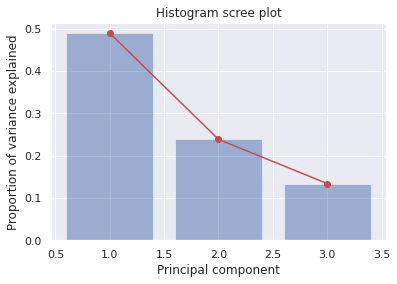

In [ ]:
fig, ax = plt.subplots()
ax.bar(range(1,4 ), pca.explained_variance_ratio_, alpha=0.5, align='center')
ax.plot(range(1,4 ), cumulative_variance, 'o-', color='r')
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.title('Histogram scree plot')